In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
VERBOSE = False
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

In [3]:
### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

In [4]:
# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

if not HTML_MODE:
    plt.show()

In [5]:
show_title(report_date)

# 国内ゲームハード週販レポート (2026-01-11) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 2026/1/11は2週合算だったため､データは処理上の都合､週次値に変換するため1/4と1/11に等分しています｡
* [過去の週販レポート](../index.html)

## 直近4週間のハード売り上げ／累計推移

In [6]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

年始もSwitch2の勢いは止まらず､二週間で31万台を販売し､累計が400万台を突破しました｡

年始のPS5は絶好調でした｡2週間で4万6千台を販売し､730万台を超えました｡
第4四半期に強いPlayStationは健在です｡

SwitchはPS5を僅かに下回りました｡
一部で品切れも伝えられており､世代交代が加速しています｡



## 週販推移

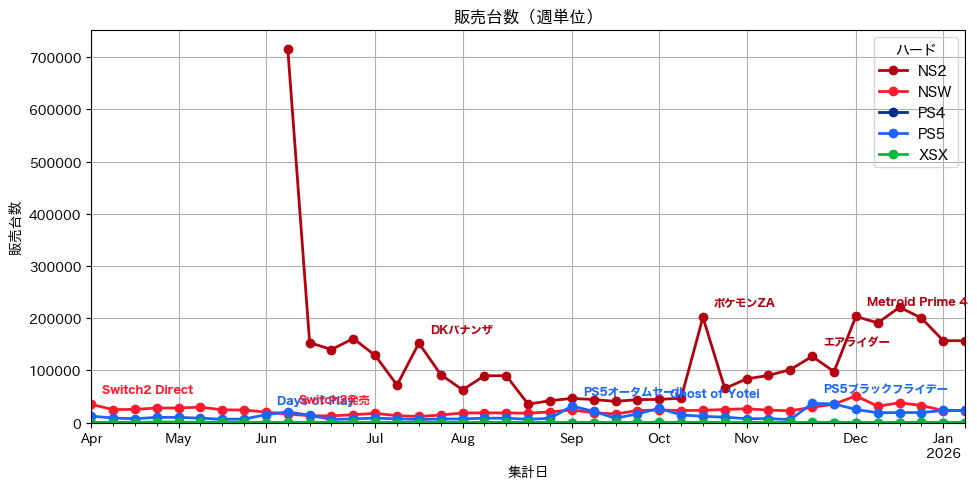

In [7]:
(weekly_fig, weekly_df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=he.EVENT_MASK_MIDDLE)

### 週販推移(拡大）

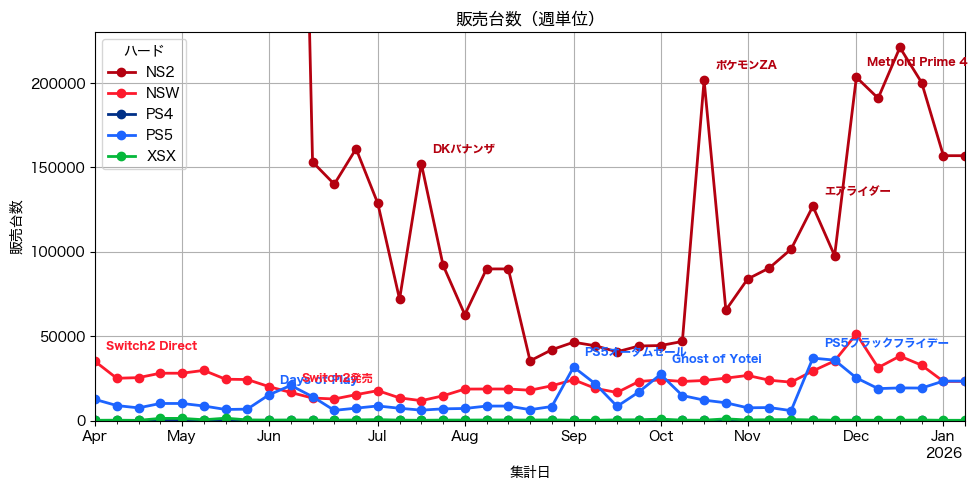

In [8]:
(weekly_big_fig, weekly_big_df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=230000, event_mask=he.EVENT_MASK_MIDDLE)

12月ほどの出荷数はありませんが､Switch2は年始も大量に販売されました｡
一方､Switchは落ち着いていくことでしょう｡週あたり2万を切るのが通常になると思います｡

PS5はクリスマスシーズンよりも好調です｡
例年､1月, 2月, 3月が好調なPlayStation.この3ヶ月間で2026年の趨勢が決まります｡


## 月間販売推移

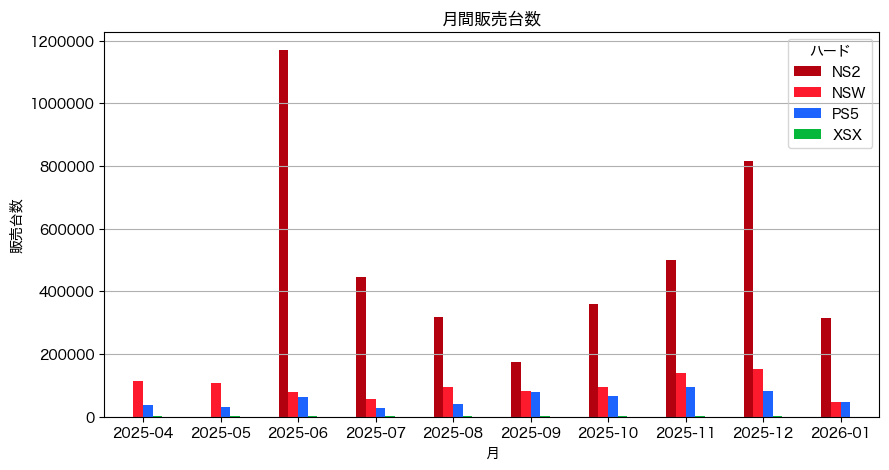

In [9]:
(mbh_fig, mbh_df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

In [38]:
if VERBOSE:
    month_style = ch.style_sales(mbh_df, gradients=["NS2", "PS5", "NSW", "XSX"])
    display(month_style)

### Nintendo Switchの月間販売台数： 前々年､前年との比較

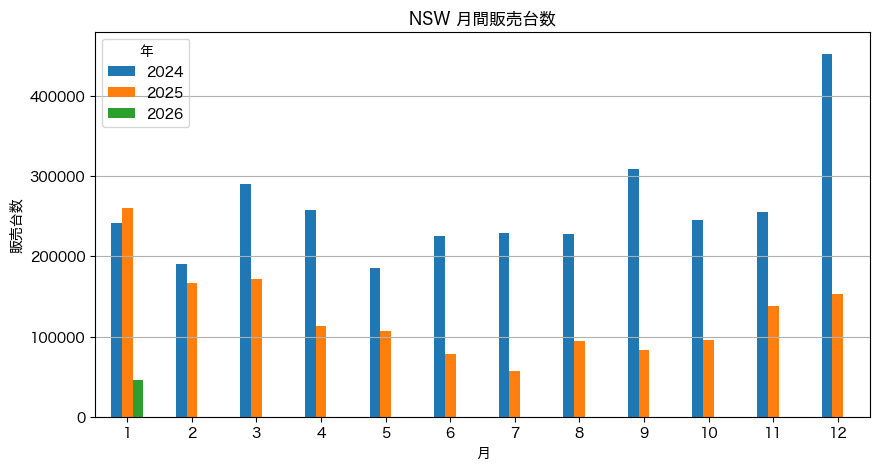

In [14]:
(my_ns_fig, my_ns_df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [15]:
if True:
    this_year = report_date.year
    my_ns_df2 = my_ns_df.drop(columns=[this_year - 2])
    my_ns_df2.loc[:, "YoY"] = my_ns_df2.loc[:,this_year] / my_ns_df2.loc[:, this_year - 1]
    my_ns_style = my_ns_df2.style.format({'YoY': '{:.1%}', this_year: '{:,.0f}', this_year - 1: '{:,.0f}'})
    
    display(my_ns_style)

year,2025,2026,YoY
month,,,
1,"260,447","46,360",17.8%
2,"167,188",0,0.0%
3,"171,921",0,0.0%
4,"113,513",0,0.0%
5,"106,506",0,0.0%
6,"78,097",0,0.0%
7,"57,532",0,0.0%
8,"94,517",0,0.0%
9,"82,946",0,0.0%


既に1月は2週間分合算であることを考慮すると､
2026年1月の前年比は40%に届かない､急激な落ち込みの可能性が高いです｡

### PlayStation 5の月間販売台数： 前々年､前年との比較


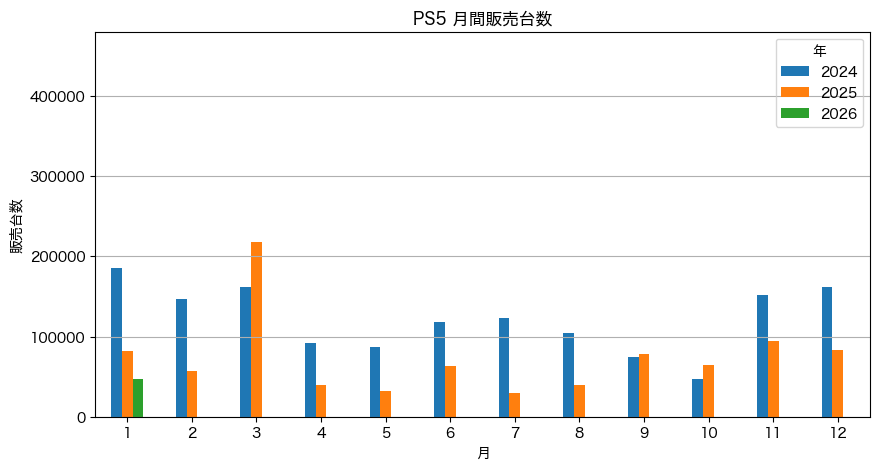

In [18]:
(my_ps5_fig, my_ps5_df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, 
                                        begin=gu.years_ago(report_date), end=report_date)

In [19]:
if True:
    this_year = report_date.year
    my_ps5_df2 = my_ps5_df.drop(columns=[this_year - 2])
    my_ps5_df2.loc[:, "YoY"] = my_ps5_df2.loc[:,this_year] / my_ps5_df2.loc[:, this_year - 1]
    ps5_monthly_style = ch.style_sales(my_ps5_df2, percent_columns=["YoY"], columns=[this_year, this_year - 1])
    display(ps5_monthly_style)

year,2025,2026,YoY
month,,,
1,"81,587","46,753",57.3%
2,"56,886",0,0.0%
3,"218,300",0,0.0%
4,"38,983",0,0.0%
5,"32,001",0,0.0%
6,"63,516",0,0.0%
7,"28,959",0,0.0%
8,"39,004",0,0.0%
9,"78,693",0,0.0%


PS5の2026年1月は好調です｡値下げ効果が出てきたのか､昨年の1月を超える可能性があります｡


## 累計販売推移


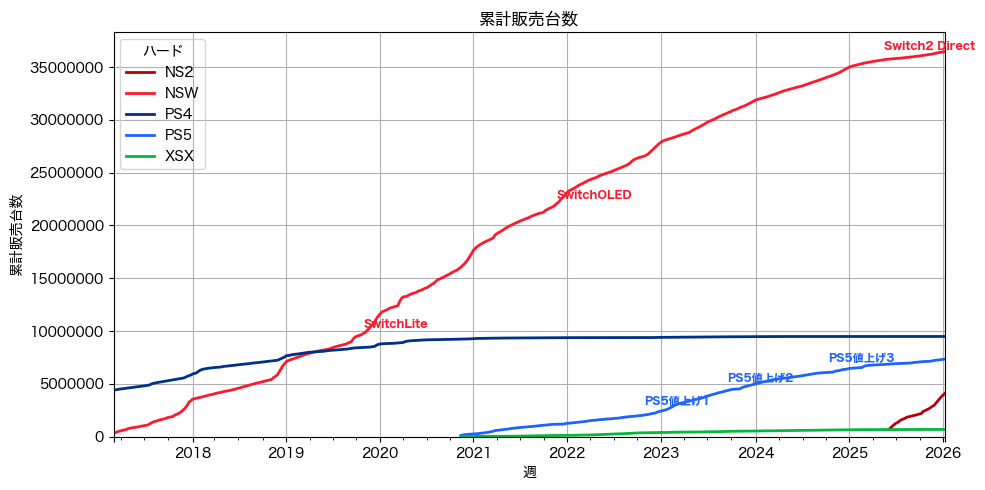

In [20]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(cumulative_sales_fig, cumulative_sales_df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = he.EVENT_MASK_LONG)

In [39]:
cs_style = ch.style_sales(cumulative_sales_df.tail(1), datetime_index=True)
display(cs_style) if VERBOSE else None

Switch2の累計は409万台に到達しました｡
一方､PS5の累計が730万台に到達しました｡

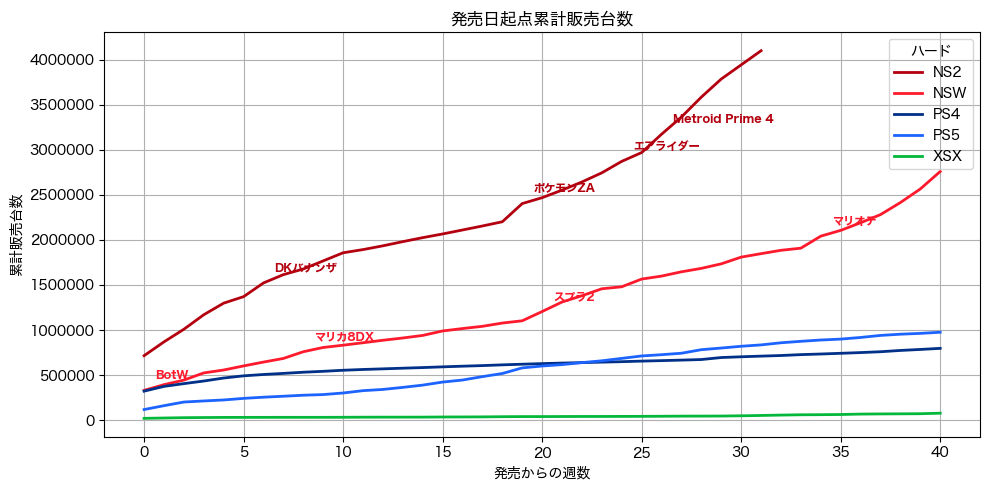

In [22]:
(csd_fig, csd_df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=he.EVENT_MASK_MIDDLE)

In [40]:
csd_style = ch.style_sales(csd_df.iloc[28:32, :])
display(csd_style) if VERBOSE else None

### PS5値下げ効果をPS4と比較で可視化

Switch2対抗として語られることもあるPS5DE日本語版の値下げですが､その面での効果は特にありませんでした｡
しかし､PS4との推移比較では重要な効果を発揮していることが分かります｡

以下は､PS4とPS5のそれぞれの発売からの累計台数の推移をプロットしたものです｡横軸は週(Week)です｡

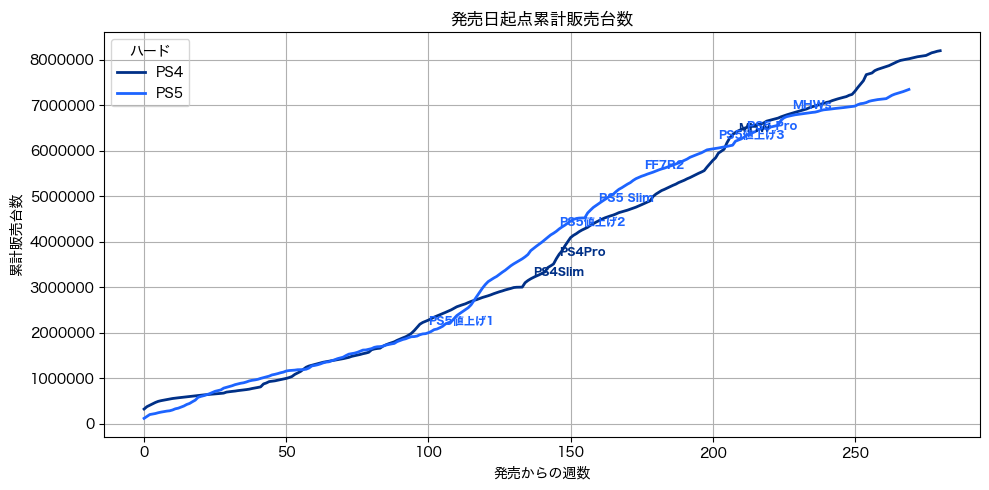

In [25]:
ps45_event_mask = he.EventMasks(hard=1.5, soft=1, event=1, price=1, sale=0)
(csd_ps45_fig, csd_ps45_df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=ps45_event_mask)

100週まではPS4,PS5は同等ですが､120週目あたりからPS5が加速しPS4を上回ります｡
しかし､200週を超えた辺りで逆転します｡MHWs効果で225週目でPS5はPS4に追いつきそうになりますが､
その後のPS5はPS4に遅れを取り､差はどんどん広がっていきます｡

以下は､PS4,PS5の同時期の累計差のグラフです｡プラスの値ならPS5が(PS4比で)好調､マイナス値ならPS5不調(PS4比で)を示します｡


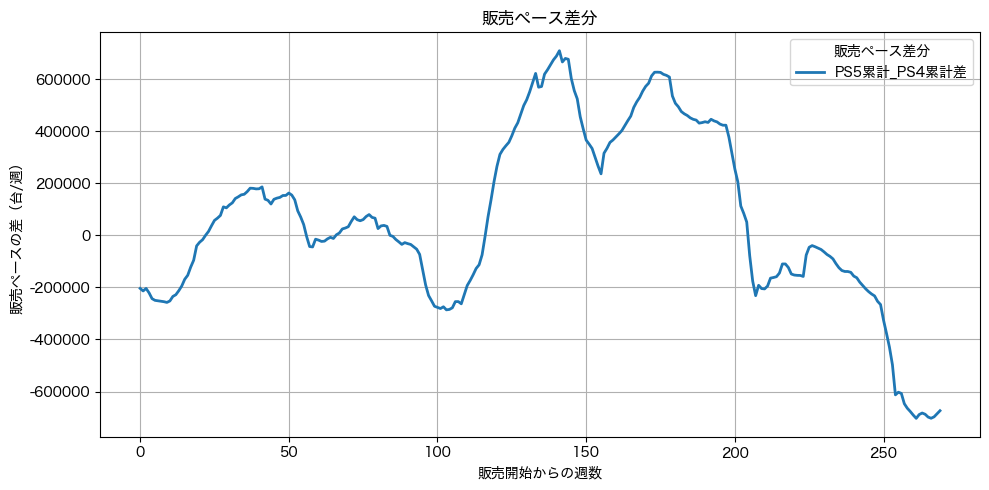

In [26]:
(fig_ps4_ps5_diff, df_ps4_ps5_diff) = ph.plot_sales_pase_diff('PS4', 'PS5')



225週目､MHWs効果で一旦0に近づきますが､その後は急降下しています｡
これはMHWs以降のPS5がPS4に比べて極めて不調であったことを示します｡
(大作ソフト発売後に絶不調になるのはソニーにとっても予想困難だったでしょう)

この急降下を止めたのが **PS5DE日本語版の値下げ** です｡

PS5とPS4の差は値下げ版発売週直前の2025/11/16に最低値の-703,092台を記録した後､
値下げとブラックフライデー効果により､-682,674まで持ち直しました｡
2026/1/11集計でも -673,797 で､値下げ前の最悪値から持ち直しています｡

つまり､PS5DE日本語版の値下げにより､**同時期のPS4と同程度のペース** になりつつあります｡

In [29]:
ps4_ps5_10 = df_ps4_ps5_diff.tail(10)
ps4_ps5_10 = ps4_ps5_10.rename(columns={'ps4_report_date': 'PS4集計週', 'ps5_report_date': 'PS5集計週'})
s5 = ch.style_sales(ps4_ps5_10, columns=['PS5累計_PS4累計差'], date_columns=["PS4集計週", "PS5集計週"], gradients=['PS5累計_PS4累計差'])
display(s5)

,PS5累計_PS4累計差,PS4集計週,PS5集計週
260,"-690,575",2019-02-17,2025-11-09
261,"-703,092",2019-02-24,2025-11-16
262,"-688,511",2019-03-03,2025-11-23
263,"-682,674",2019-03-10,2025-11-30
264,"-687,382",2019-03-17,2025-12-07
265,"-698,216",2019-03-24,2025-12-14
266,"-702,772",2019-03-31,2025-12-21
267,"-697,394",2019-04-07,2025-12-28
268,"-685,811",2019-04-14,2026-01-04
269,"-673,797",2019-04-21,2026-01-11


これが一時的な効果なのか､2026年を通じて効果があるのかに注目です｡

## Switch2初動状況

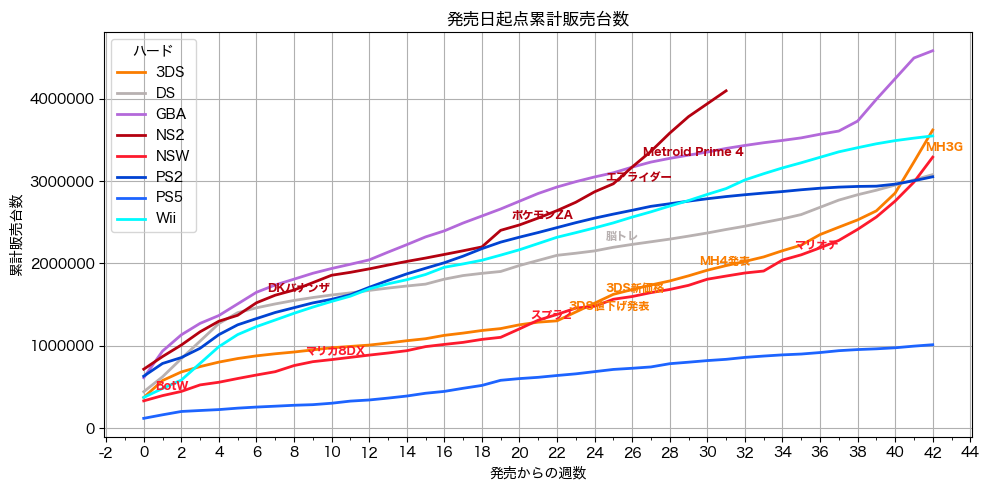

In [30]:
(csd_ns2_fig, csd_ns2_df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=42,
                                        event_mask=he.EVENT_MASK_MIDDLE)

In [32]:
df12 = csd_ns2_df.iloc[csd_ns2_df.index == 31]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)

styled_df12_unpivot = ch.style_sales(df12_unpivot, columns=['販売数'], bars=['販売数'])
display(styled_df12_unpivot)

,週数,販売数
ハード,,
NS2,31,"4,097,905"
GBA,31,"3,397,822"
Wii,31,"2,909,931"
PS2,31,"2,812,871"
DS,31,"2,412,921"
3DS,31,"1,973,953"
NSW,31,"1,847,008"
PS5,31,"835,145"


Switch2は32週目で400万台を突破し､歴代初動1位の座をキープしています｡
GBAよりも7週間早い達成です｡


## 年単位の状況


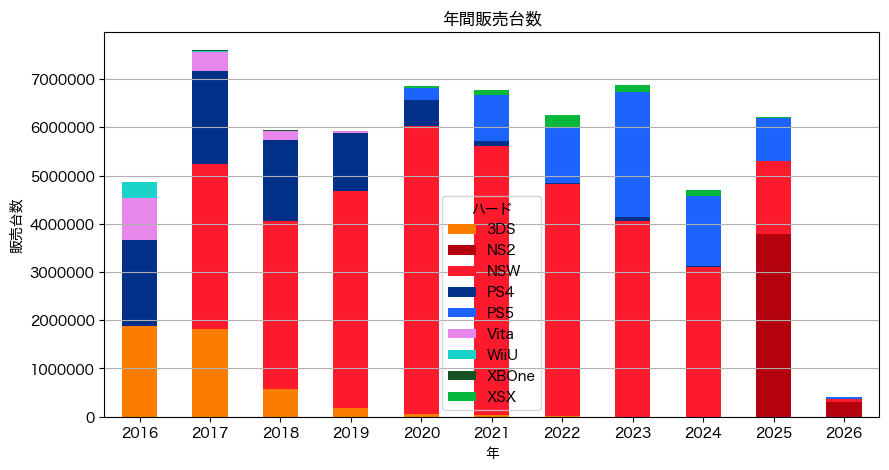

In [33]:
(yb_fig, yb_df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [34]:
yb_df["合計"] = yb_df.sum(axis=1)
yearly_style = ch.style_sales(yb_df)
display(yearly_style)

hw,3DS,NS2,NSW,PS4,PS5,Vita,WiiU,XBOne,XSX,合計
year,,,,,,,,,,
2016,"1,874,457",0,0,"1,790,883",0,"865,002","336,151","8,897",0,"4,875,390"
2017,"1,827,131",0,"3,407,158","1,935,247",0,"396,207","21,817","14,664",0,"7,602,224"
2018,"566,420",0,"3,482,388","1,695,227",0,"181,728",0,"15,339",0,"5,941,102"
2019,"191,173",0,"4,493,903","1,196,153",0,"37,668",0,"8,315",0,"5,927,212"
2020,"62,761",0,"5,956,943","542,647","255,150",0,0,"3,585","31,424","6,852,510"
2021,"28,540",0,"5,579,127","104,054","968,185",0,0,0,"97,234","6,777,140"
2022,"10,664",0,"4,804,546","22,823","1,154,054",0,0,0,"269,737","6,261,824"
2023,"3,033",0,"4,062,609","73,292","2,587,468",0,0,0,"141,712","6,868,114"
2024,162,0,"3,109,103","13,728","1,454,149",0,0,0,"118,221","4,695,363"


### 年単位のメーカーシェア

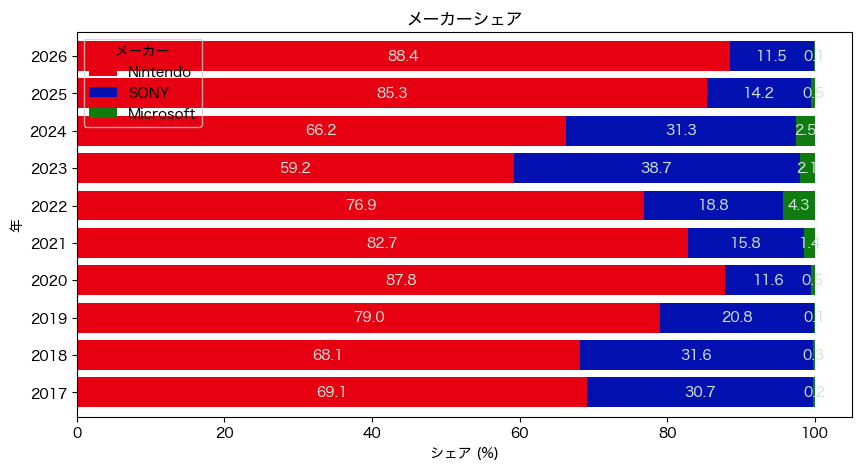

In [35]:
(msb_fig, msb_df) = ph.plot_maker_share_bar(begin=datetime(2017, 1, 1))


2026年､最初の集計では任天堂のシェアは88.4%に達しました｡
しかし第4四半期に強いPSが盛り返していくでしょう｡たぶん｡

In [41]:
if VERBOSE:
    share_style = msb_df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
    share_style = share_style.background_gradient(cmap='Blues', axis=0)
    display(share_style)

In [29]:
if False:
    (fig, df) = ph.plot_maker_share_pie(begin_year=2025, end_year=2025)